In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.9.2'

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Reading Dataset

In [3]:
dataset_path = os.path.join(os.getcwd(), 'data', 'seeds_dataset.txt')

df = pd.read_csv(dataset_path, 
                lineterminator='\n', 
                sep='\t+|\t\t',
                engine='python', 
                header=None,
                names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']
            )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Plotting the data

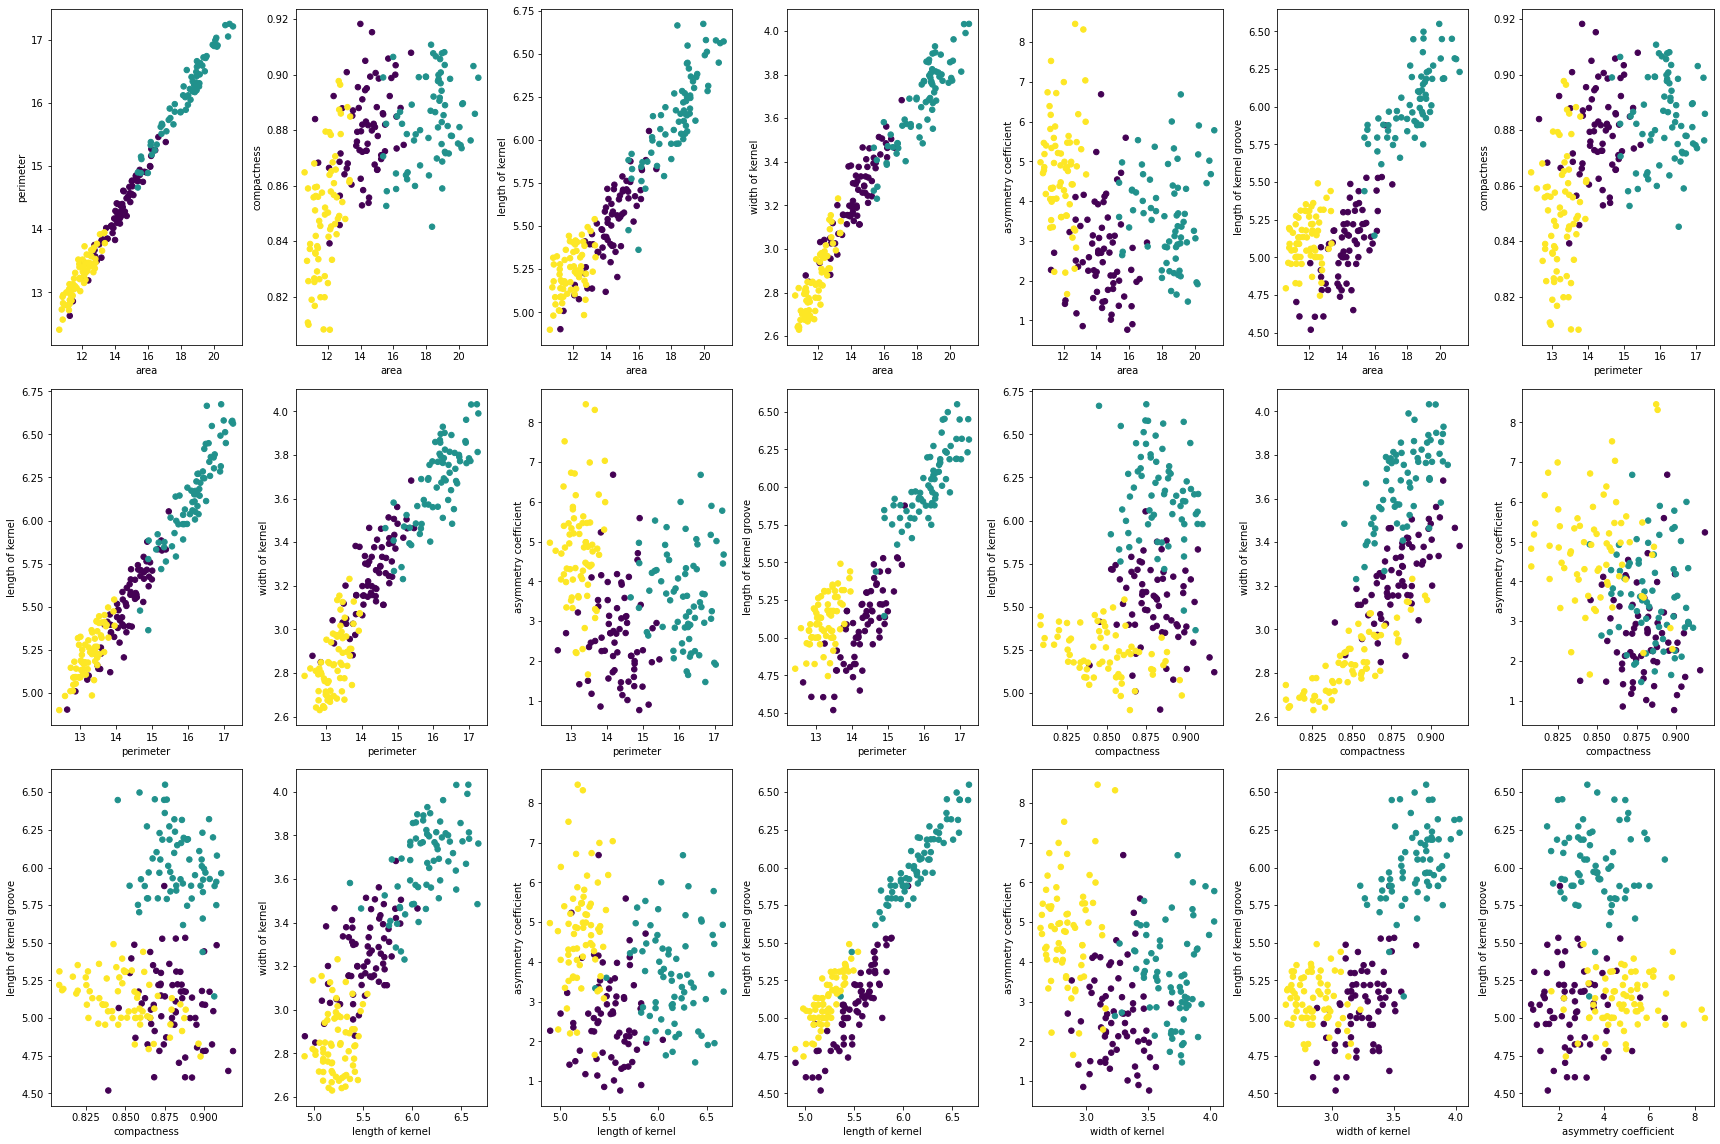

In [5]:
fig, ax = plt.subplots(figsize=(24, 16), nrows=3, ncols=7)

cnt = 0
for i in range(7):
    for j in range(i + 1, 7):
        curr_ax = ax[cnt // 7, cnt % 7]
        curr_ax.scatter(df[df.columns[i]], df[df.columns[j]], c=df['class'], cmap='viridis', s=30)
        curr_ax.set_xlabel(df.columns[i])
        curr_ax.set_ylabel(df.columns[j])
        cnt += 1

fig.tight_layout()
        

# Normalizing the data

In [6]:
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

# Overfitted TensorFlow Model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
    ])

## Plotting the model

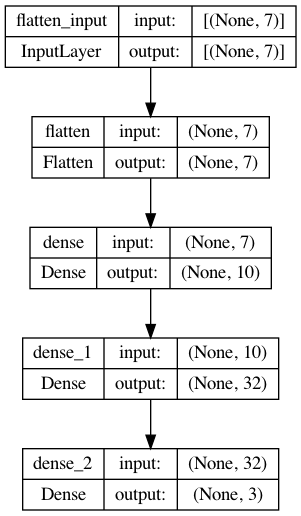

In [8]:
keras.utils.plot_model(model, show_shapes=True)

## Compiling the model

In [9]:
from gc import callbacks


compile_model = model.compile(optimizer='adam',
                              loss='mse',
                              metrics=['accuracy'])


### One-hot encoding

In [10]:
labels = (df['class'] - 1).to_numpy().reshape(-1, 1)


model.fit(df.drop('class', axis=1), 
          tf.one_hot(labels, 3),
          epochs=1000,
          callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5)],
          validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 0s 35ms/step - loss: 0.2820 - accuracy: 0.0000e+00 - val_loss: 0.2868 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.2625 - accuracy: 0.0000e+00 - val_loss: 0.2777 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.2446 - accuracy: 0.0000e+00 - val_loss: 0.2700 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.2291 - accuracy: 0.0000e+00 - val_loss: 0.2625 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.2146 - accuracy: 0.0119 - val_loss: 0.2561 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.2019 - accuracy: 0.0238 - val_loss: 0.2505 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.1897 - accuracy: 0.0417 - val_loss: 0.2

### To-Categorical

In [12]:
categorical_labels = keras.utils.to_categorical(df['class'], num_classes=3)

model2 = keras.models.clone_model(model)

model2.compile(optimizer='adam',
               loss='mse',
               metrics=['accuracy'])

model2.fit(df.drop('class', axis=1), 
           categorical_labels,
           epochs=1000,
           callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
           validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 0s 28ms/step - loss: 0.2721 - accuracy: 0.3750 - val_loss: 0.2088 - val_accuracy: 0.7619
Epoch 2/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2530 - accuracy: 0.4167 - val_loss: 0.2044 - val_accuracy: 0.7143
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2353 - accuracy: 0.5893 - val_loss: 0.2010 - val_accuracy: 0.6667
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2205 - accuracy: 0.8393 - val_loss: 0.1976 - val_accuracy: 0.6667
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.2056 - accuracy: 0.8750 - val_loss: 0.1928 - val_accuracy: 0.6667
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1933 - accuracy: 0.8988 - val_loss: 0.1884 - val_accuracy: 0.6905
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1814 - accuracy: 0.9048 - val_loss: 0.1832 - val_accuracy: 0.7143
Epoch 8/1000


In [13]:
model_tensorboard = keras.models.clone_model(model)

model_tensorboard.compile(optimizer='adam',
               loss='mse',
               metrics=['accuracy'])

model_tensorboard.fit(df.drop('class', axis=1), 
           tf.one_hot(labels, 3),
           epochs=1000,
           callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
                      keras.callbacks.ModelCheckpoint(filepath='models/model_tensorboard.h5', save_best_only=True),
                      keras.callbacks.TensorBoard(log_dir='logs')],
           validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 0s 37ms/step - loss: 0.3059 - accuracy: 0.0000e+00 - val_loss: 0.4111 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.2850 - accuracy: 0.0000e+00 - val_loss: 0.3933 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.2656 - accuracy: 0.0000e+00 - val_loss: 0.3786 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.2481 - accuracy: 0.0060 - val_loss: 0.3656 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.2314 - accuracy: 0.0357 - val_loss: 0.3545 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.2156 - accuracy: 0.1667 - val_loss: 0.3451 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.2005 - accuracy: 0.2857 - val_loss: 0.3375 

# Tensorboard

In [14]:
!tensorboard --logdir logs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# Non-Overfitting model

In [15]:
non_overfitting_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(7,)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(3, activation='sigmoid')
    ])


## Non-Overfitting model summary

In [16]:
non_overfitting_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [17]:
non_overfitting_model.compile(optimizer='adam',
                              loss='mse',
                              metrics=['accuracy'])

non_overfitting_model.fit(df.drop('class', axis=1),
                          tf.one_hot(labels, 3),
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5),
                                     keras.callbacks.ModelCheckpoint(filepath='models/model_non_overfitting.h5', save_best_only=True),
                                     keras.callbacks.TensorBoard(log_dir='logs')]
                          )

Epoch 1/100
6/6 [==============================] - 0s 37ms/step - loss: 0.2782 - accuracy: 0.0238 - val_loss: 0.2687 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2596 - accuracy: 0.0298 - val_loss: 0.2699 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2432 - accuracy: 0.0417 - val_loss: 0.2711 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2281 - accuracy: 0.0714 - val_loss: 0.2724 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2162 - accuracy: 0.0655 - val_loss: 0.2733 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2041 - accuracy: 0.1190 - val_loss: 0.2738 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1951 - accuracy: 0.1905 - val_loss: 0.2735 - val_accuracy: 0.0

## Tensorboard

In [18]:
!tensorboard --logdir logs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# Thanks for reading this Notebook!